**Assignment – Model Selection**

Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
data=pd.read_csv('/content/titanic_dataset .csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Understanding* the data


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# Find the missing values from each column of this dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data['Name'].nunique()

891

In [6]:
data['Ticket'].nunique()

681

In [7]:
data['Embarked'].nunique()

3

In [8]:
#dropping the columns
data.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [9]:
data['Sex'].nunique()

2

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

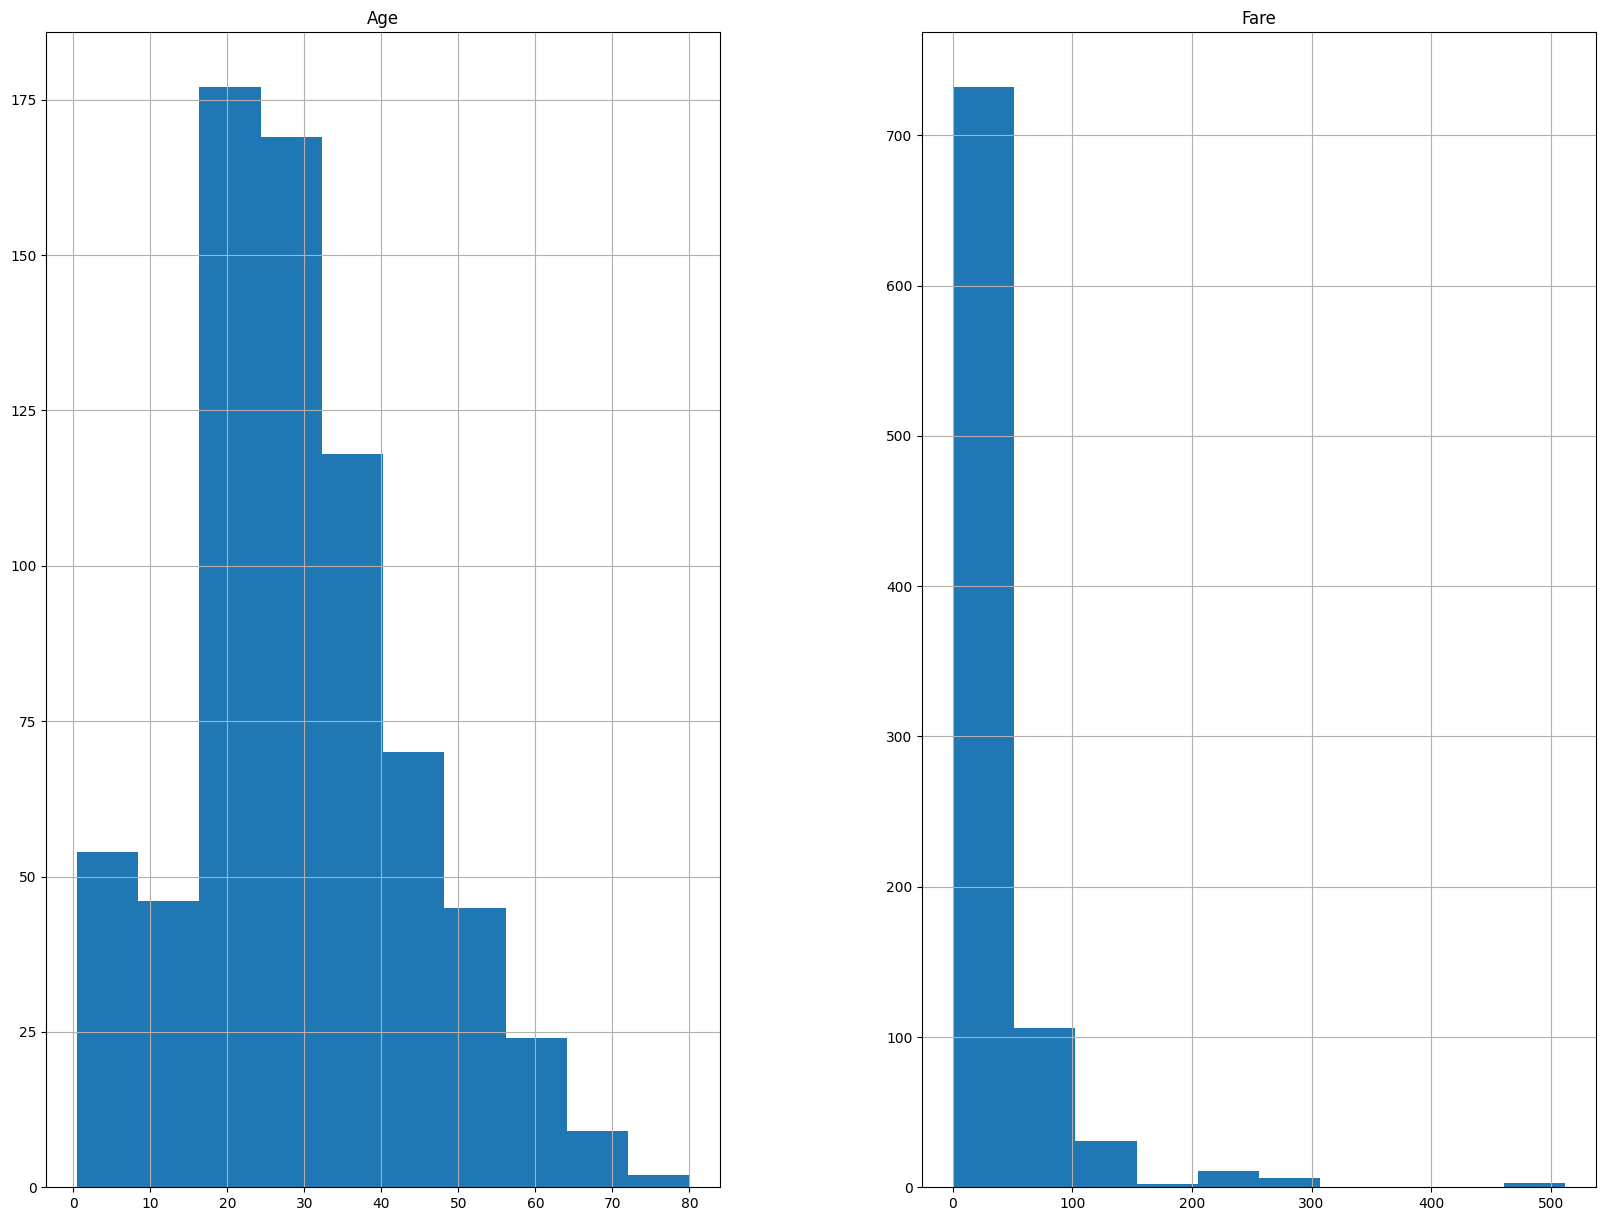

In [11]:
freq_graph=data.select_dtypes(include='float64')
freq_graph.hist(figsize=(20,15))

In [12]:
# filling the missing value using median and mode
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


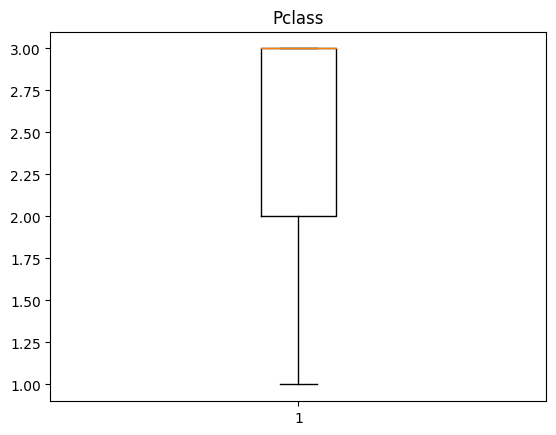

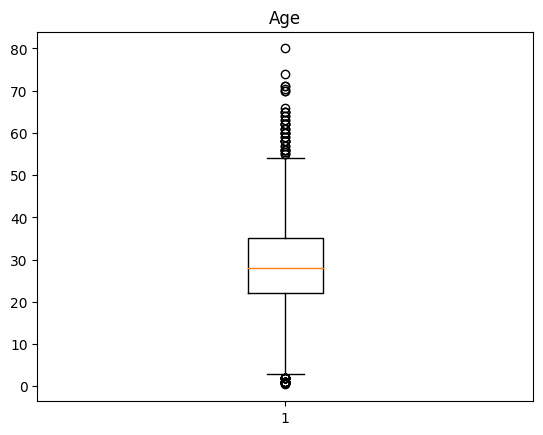

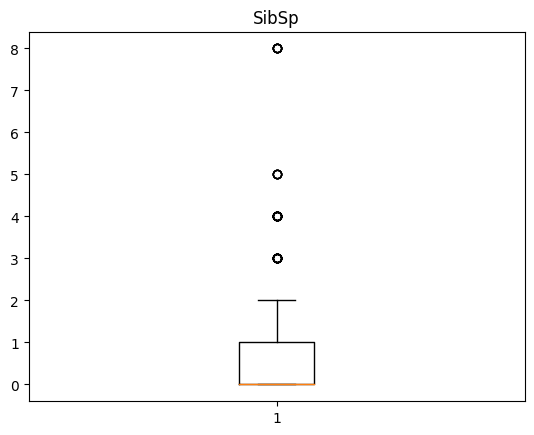

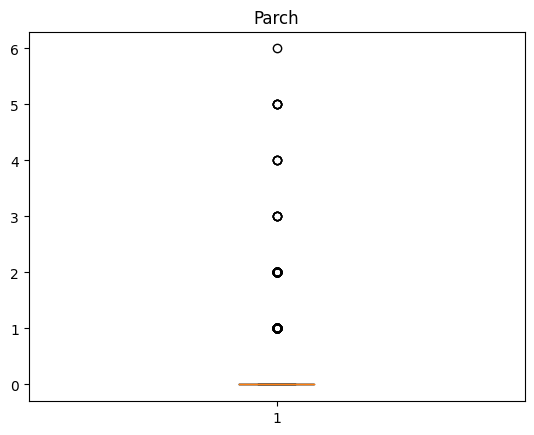

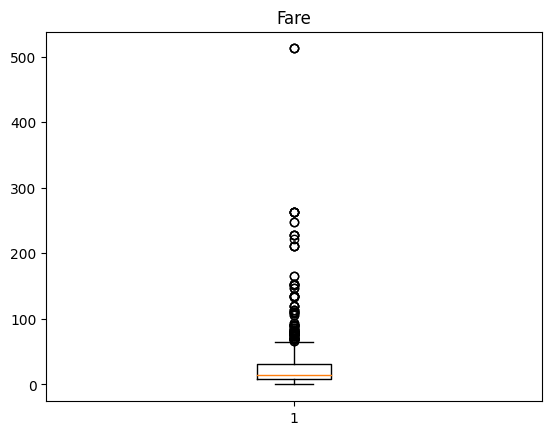

In [15]:
# Checking Outliers
num_cols=['Pclass','Age','SibSp','Parch','Fare']

for i in num_cols:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show();

In [16]:
Outliers=['Pclass','Age','SibSp','Parch','Fare']

for i in Outliers:


  # Handling outlier using IQR method
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)

  # Calculate the interquartile range (IQR)
  IQR = Q3 - Q1

  # Define the lower and upper limit for outliers
  lower_lim = Q1 - 1.5 * IQR
  upper_lim = Q3 + 1.5 * IQR

  # Clip outliers to the lower and upper limit
  data[i] = data[i].clip(lower=lower_lim, upper=upper_lim)



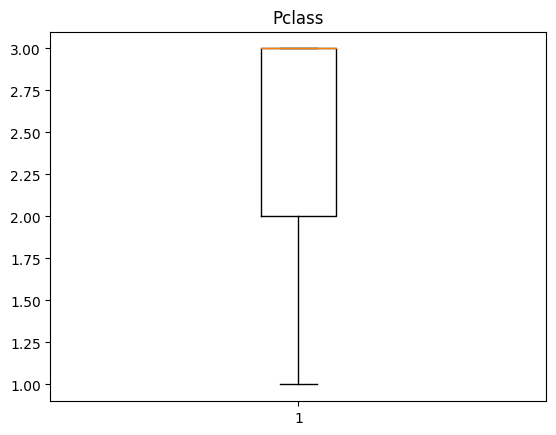

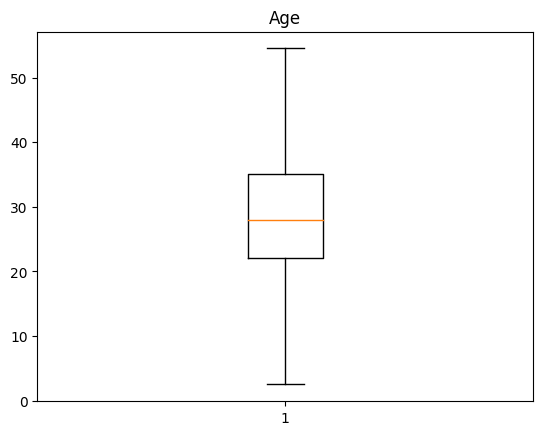

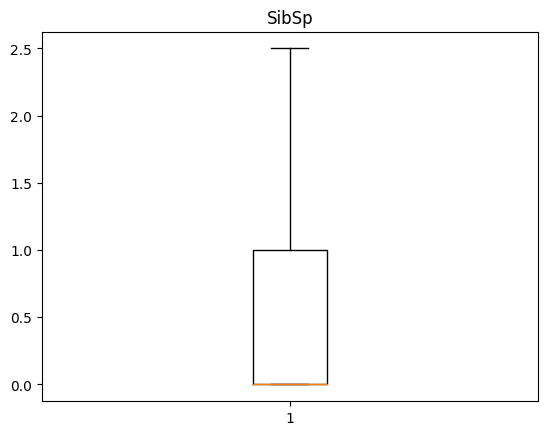

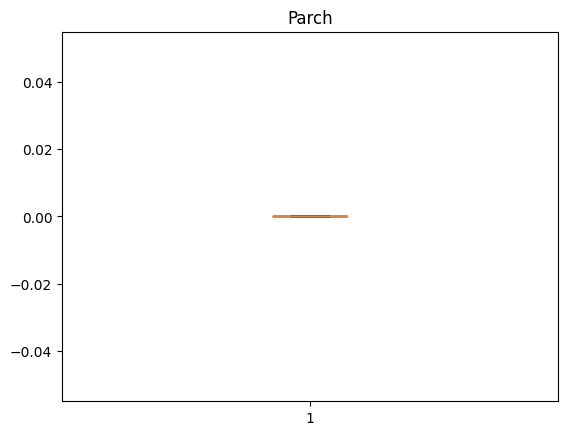

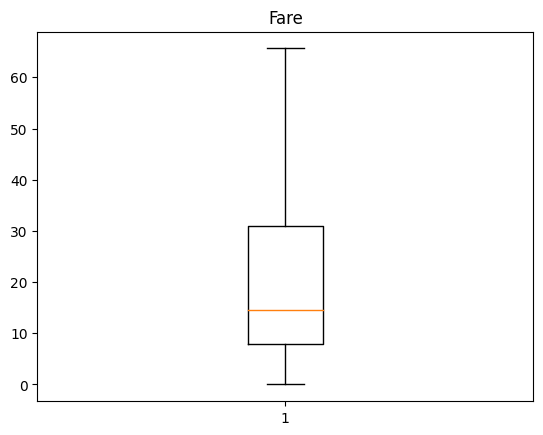

In [17]:
num_cols=['Pclass','Age','SibSp','Parch','Fare']

for i in num_cols:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show();

Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,2
2,1,1,0,38.0,1.0,0,65.6344,0
3,1,3,0,26.0,0.0,0,7.9250,2
4,1,1,0,35.0,1.0,0,53.1000,2
5,0,3,1,35.0,0.0,0,8.0500,2


In [20]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.039282,0.426487,0.0,24.046813,1.536476
std,0.486592,0.836071,0.477990,12.072074,0.708246,0.0,20.481625,0.791503
min,0.000000,1.000000,0.000000,2.500000,0.000000,0.0,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.0,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.0,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.0,31.000000,2.000000
max,1.000000,3.000000,1.000000,54.500000,2.500000,0.0,65.634400,2.000000


In [21]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Correlation

<Axes: >

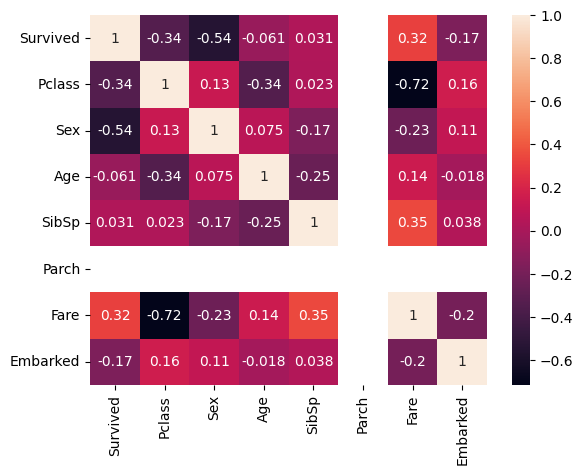

In [22]:
sns.heatmap(data.corr(),annot=True)

In [23]:
data['Parch'].value_counts()

0    891
Name: Parch, dtype: int64

In [24]:
#Splitting dependent and independent features
y=data['Survived']
x=data.drop('Survived',axis=1)

In [25]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [28]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  knn_model=classifier.fit(x_train,y_train)
  y_pred_knn=knn_model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

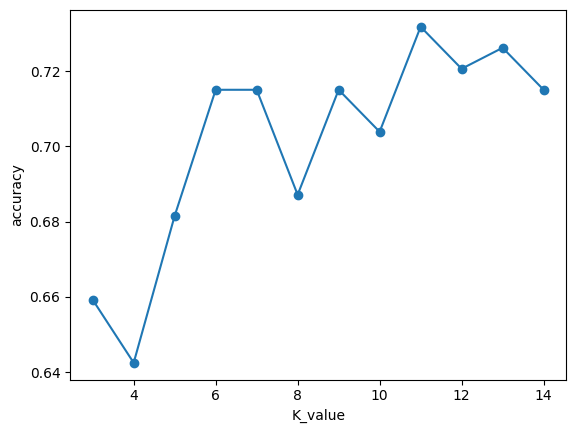

In [29]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [30]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
  knn_model=classifier.fit(x_train,y_train)
  y_pred_knn=knn_model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

In [31]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn))
print('F1:',f1_score(y_test,y_pred_knn))

Accuracy: 0.7318435754189944
Precision: 0.75
recall: 0.527027027027027
F1: 0.619047619047619


The accuracy model of KNN is 73%



SVM

In [32]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_model=sv_cl.fit(x_train,y_train)

In [33]:
y_pred=sv_model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7821229050279329


The accuracy model of SVM in kernal linear is 78%



In [35]:
print(confusion_matrix(y_test,y_pred))


[[88 17]
 [22 52]]


Hold out cross Validation-KNN

In [36]:
score_knn=knn_model.score(x_test,y_test)

In [37]:
print('Model score in KNN',score_knn )


Model score in KNN 0.7318435754189944


K Fold

In [38]:
from sklearn.model_selection import KFold


In [39]:
kfold_validator=KFold(10)

In [40]:
for train_index,test_index in kfold_validator.split(x,y):
  print('train_index:', train_index)
  print('test_index:', test_index)

train_index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [41]:
from sklearn.model_selection import cross_val_score
cv_score_knn_kfold=cross_val_score(knn_model,x,y,cv=kfold_validator)

In [42]:
cv_score_knn_kfold

array([0.62222222, 0.66292135, 0.65168539, 0.71910112, 0.66292135,
       0.78651685, 0.75280899, 0.73033708, 0.78651685, 0.75280899])

In [43]:
cv_score_knn_kfold.mean()

0.7127840199750313

Stratified Kfold CV

In [44]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)


In [45]:
from sklearn.model_selection import cross_val_score
cv_score_knn_str_kfold=cross_val_score(knn_model,x,y,cv=stratified_cv)

In [46]:
for train_index,test_index in stratified_cv.split(x,y):
  print('train_index:', train_index)
  print('test_index:', test_index)

train_index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [47]:
cv_score_knn_str_kfold

array([0.62222222, 0.65168539, 0.64044944, 0.75280899, 0.69662921,
       0.74157303, 0.76404494, 0.75280899, 0.74157303, 0.74157303])

In [48]:
cv_score_knn_str_kfold.mean()

0.7105368289637953

one hold Cross validation-SVM

In [49]:
score_sv=sv_model.score(x_test,y_test)

In [50]:
print('Model score in SVM',score_sv)


Model score in SVM 0.7821229050279329


K Fold

In [51]:
from sklearn.model_selection import KFold


In [52]:
kfold_validator=KFold(10)

In [53]:
for train_index,test_index in kfold_validator.split(x,y):
  print('train_index:', train_index)
  print('test_index:', test_index)

train_index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [54]:
cv_score_svm_kfold=cross_val_score(sv_model,x,y,cv=kfold_validator)

In [55]:
cv_score_svm_kfold

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [56]:
cv_score_svm_kfold.mean()

0.786729088639201

Stratified Kfold CV

In [57]:
#Stratified Kfold CV
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)



In [58]:
cv_score_svm_str_kfold=cross_val_score(sv_model,x,y,cv=stratified_cv)

In [59]:
for train_index,test_index in stratified_cv.split(x,y):
  print('train_index:', train_index)
  print('test_index:', test_index)

train_index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [60]:
cv_score_svm_str_kfold

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [61]:
cv_score_svm_str_kfold.mean()

0.786729088639201

In [62]:
print("Mean CV accuracy of KFold for KNN:", cv_score_knn_kfold.mean())
print("Mean CV accuracy of Stratified KFold for KNN:", cv_score_knn_str_kfold.mean())
print("Mean CV accuracy of KFold for SVM:", cv_score_svm_kfold.mean())
print("Mean CV accuracy of Stratified KFold for SVM:", cv_score_svm_str_kfold.mean())


Mean CV accuracy of KFold for KNN: 0.7127840199750313
Mean CV accuracy of Stratified KFold for KNN: 0.7105368289637953
Mean CV accuracy of KFold for SVM: 0.786729088639201
Mean CV accuracy of Stratified KFold for SVM: 0.786729088639201




KFold and Stratified KFold of SVM has the same average accuracy

KFold of KNN has the highest average accuracy